"FCD Type I" refers to a subtype of FCD that is characterized by abnormal cortical lamination, meaning that the layers of the cortex are not organized properly. "FCD Type I" can be further subdivided into "FCD Type IA" and "FCD Type IB" based on the presence or absence of dysmorphic neurons, which are neurons that have abnormal morphology.

"FCD Type IIA", "FCD Type IC", and "FCD Type IIID" are considered more severe than "FCD Type I" subtypes and involve more extensive cortical malformations, including abnormal gyration patterns and disorganized cell structures. These subtypes may also be associated with more severe epilepsy and other neurological symptoms.

In [1]:
import anndata
import scanpy as sc

townsend_JLE48_3 = anndata.read_h5ad("townsend_JLE48_3") #FCD Type IIA
townsend_JLE49_3 = anndata.read_h5ad("townsend_JLE49_3") #FCD Type type IC
townsend_JLE50_3 = anndata.read_h5ad("townsend_JLE50_3") #FCD Type type IIID
westfall_JLE18 = anndata.read_h5ad("westfall_JLE18") #FCD Type I
westfall_JLE33 = anndata.read_h5ad("westfall_JLE33") #FCD Type I
westfall_NB1499 = anndata.read_h5ad("westfall_NB1499") #autopsy control brain
westfall_NB4327 = anndata.read_h5ad("westfall_NB4327") #autopsy control brain

/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/site-packages/scanpy/plot

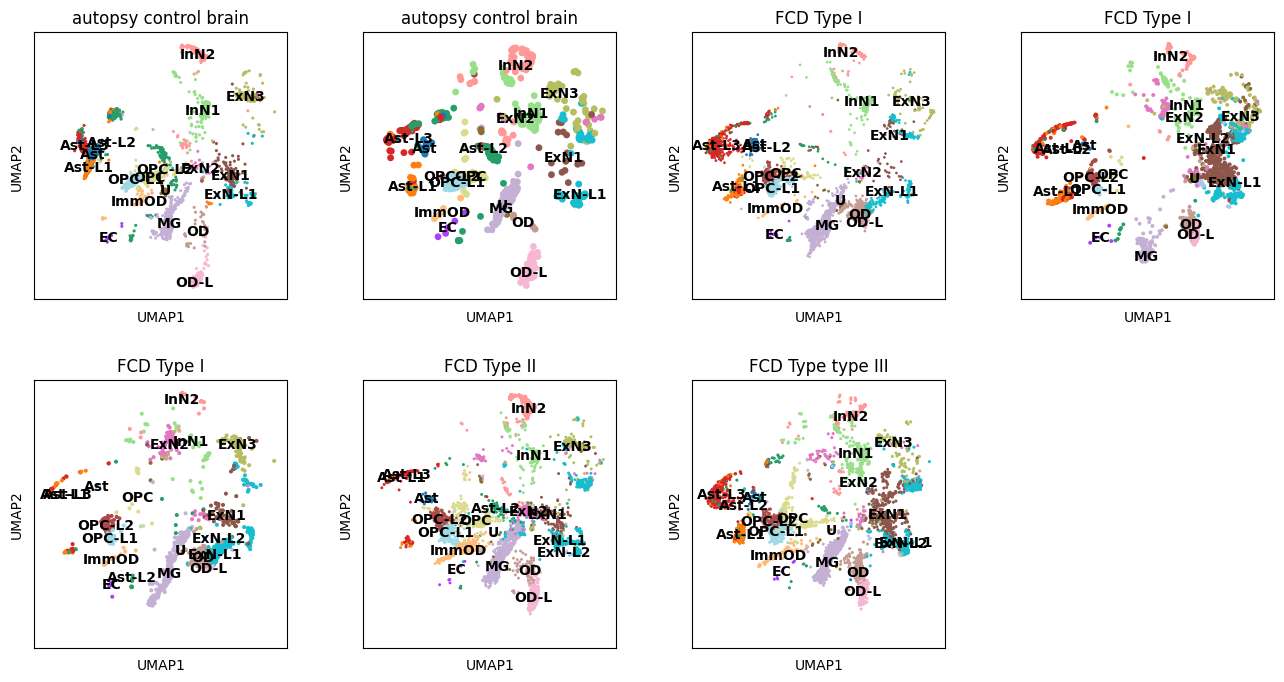

In [ ]:
import math
import matplotlib.pyplot as plt

# Load your 8 preprocessed, annotated, and clustered AnnData objects into a list
adatas = [westfall_NB1499, 
          westfall_NB4327,
          townsend_JLE49_3, 
         westfall_JLE18,
          westfall_JLE33,
          townsend_JLE48_3, 
          townsend_JLE50_3]

adatas_titles = [ "autopsy control brain",
                 "autopsy control brain", 
                 "FCD Type I", 
                 "FCD Type I",
                 "FCD Type I",
                 "FCD Type II",
                 "FCD Type type III",
                 ] 

n_plots = len(adatas)
n_rows = int(math.sqrt(n_plots))
n_cols = int(math.ceil(n_plots / n_rows))

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharex=True, sharey=True)

# Flatten the axs array to allow for iteration over each axis
axs = axs.flatten()

# Loop through each AnnData object and create a UMAP plot in the corresponding subplot
for i, adata in enumerate(adatas):
    ax = axs[i]
    sc.pl.umap(adata, color=['cell_type_detail'], legend_loc='on data',ax=ax, show=False)
    ax.set_title(f"{adatas_titles[i]}")
# Remove any unused subplots
for ax in axs[n_plots:]:
    ax.remove()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

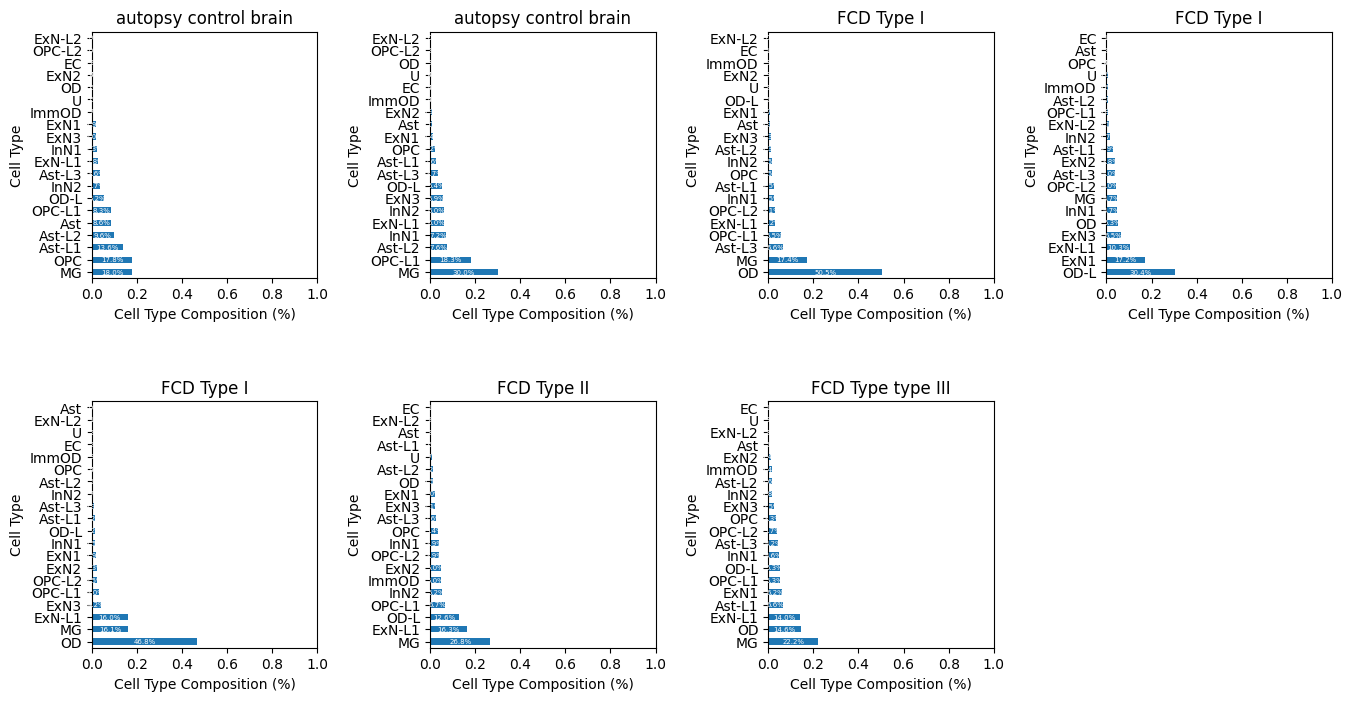

In [9]:
import math
import matplotlib.pyplot as plt


# Load your 8 preprocessed, annotated, and clustered AnnData objects into a list
adatas = [westfall_NB1499, 
          westfall_NB4327,
          townsend_JLE49_3, 
         westfall_JLE18,
          westfall_JLE33,
          townsend_JLE48_3, 
          townsend_JLE50_3]

adatas_titles = [ "autopsy control brain",
                 "autopsy control brain", 
                 "FCD Type I", 
                 "FCD Type I",
                 "FCD Type I",
                 "FCD Type II",
                 "FCD Type type III",
                 ] 

n_plots = len(adatas)
n_rows = int(math.sqrt(n_plots))
n_cols = int(math.ceil(n_plots / n_rows))

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

# Flatten the axs array to allow for iteration over each axis
axs = axs.flatten()

# Loop through each AnnData object and create a stacked horizontal bar plot of cell type composition
for i, adata in enumerate(adatas):
    ax = axs[i]
    cell_types = adata.obs['cell_type_detail'].value_counts(normalize=True)
    cell_types.plot(kind='barh', ax=ax, stacked=True)
    ax.set_title(f"{adatas_titles[i]}")
    ax.set_xlabel("Cell Type Composition (%)")
    ax.set_ylabel("Cell Type")

    # Add percentage labels to each segment of the stacked bar
    for j, v in enumerate(cell_types):
        #ax.text(v/2, j, f"{v*100:.1f}%", ha='center', va='center', color='white')
        ax.text(v/2, j, f"{v*100:.1f}%", ha='center', va='center', color='white', fontsize=5)


    # Set x-axis limits to 0 and 100%
    ax.set_xlim(0, 1)

# Remove any unused subplots
for ax in axs[n_plots:]:
    ax.remove()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.savefig("composition", dpi=1000)
plt.show()

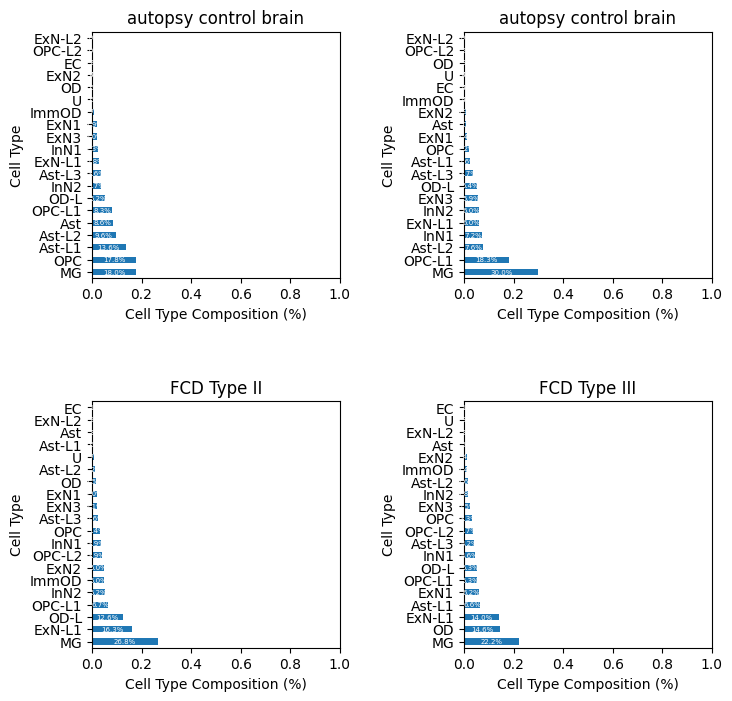

In [27]:
import math
import matplotlib.pyplot as plt


# Load your 8 preprocessed, annotated, and clustered AnnData objects into a list
adatas = [westfall_NB1499, 
          westfall_NB4327,
          townsend_JLE48_3, 
          townsend_JLE50_3
          ]

adatas_titles = [ "autopsy control brain",
                 "autopsy control brain", 
                 "FCD Type II", 
                 "FCD Type III"
                 ] 

n_plots = len(adatas)
n_rows = int(math.sqrt(n_plots))
n_cols = int(math.ceil(n_plots / n_rows))

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

# Flatten the axs array to allow for iteration over each axis
axs = axs.flatten()

# Loop through each AnnData object and create a stacked horizontal bar plot of cell type composition
for i, adata in enumerate(adatas):
    ax = axs[i]
    cell_types = adata.obs['cell_type_detail'].value_counts(normalize=True)
    cell_types.plot(kind='barh', ax=ax, stacked=True)
    ax.set_title(f"{adatas_titles[i]}")
    ax.set_xlabel("Cell Type Composition (%)")
    ax.set_ylabel("Cell Type")

    # Add percentage labels to each segment of the stacked bar
    for j, v in enumerate(cell_types):
        #ax.text(v/2, j, f"{v*100:.1f}%", ha='center', va='center', color='white')
        ax.text(v/2, j, f"{v*100:.1f}%", ha='center', va='center', color='white', fontsize=5)


    # Set x-axis limits to 0 and 100%
    ax.set_xlim(0, 1)

# Remove any unused subplots
for ax in axs[n_plots:]:
    ax.remove()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.savefig("figure_2B", dpi=1000)
plt.show()

<Figure size 640x480 with 0 Axes>

In [10]:
townsend_JLE48_3.obs['dataset'] = 'townsend'
townsend_JLE49_3.obs['dataset'] = 'townsend'
townsend_JLE50_3.obs['dataset'] = 'townsend'
westfall_JLE18.obs['dataset'] = 'westfall'
westfall_JLE33.obs['dataset'] = 'westfall'
westfall_NB1499.obs['dataset'] = 'westfall'
westfall_NB4327.obs['dataset'] = 'westfall'

In [11]:
# concatenating data together 

#names assigned based on sample
adata = townsend_JLE48_3.concatenate(
    townsend_JLE49_3,
    townsend_JLE50_3,
    westfall_JLE18,
    westfall_JLE33,
    westfall_NB1499,
    westfall_NB4327,
    batch_key="batch",  # set the batch key to identify the individual datasets
    batch_categories=["townsend_JLE48_3", "townsend_JLE49_3", "townsend_JLE50_3", "westfall_JLE18", "westfall_JLE33", "westfall_NB1499", "westfall_NB4327"]  # set the batch categories to identify each dataset
)

/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


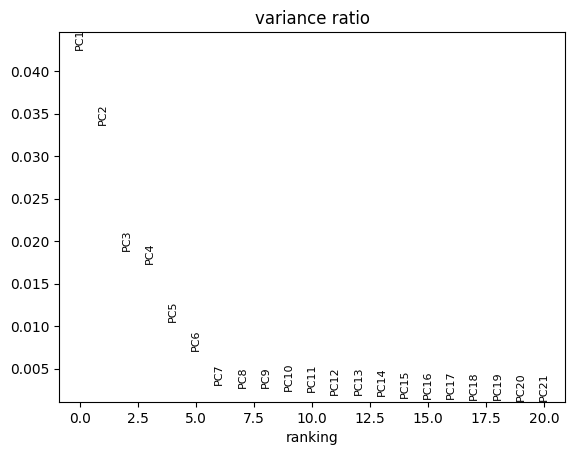

In [12]:
# Identify variable genes
sc.pp.highly_variable_genes(adata)

# Z-score scale. Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

# PCA, default subsets to highly variable features
sc.tl.pca(adata)

# A visualization that is useful for determining how many PCs to include
sc.pl.pca_variance_ratio(adata, n_pcs=20)       

In [13]:

# computing the neighborhood graph and find clusters
sc.pp.neighbors(adata, n_pcs=20)
sc.tl.leiden(adata, resolution=.2)
sc.tl.umap(adata)          

/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


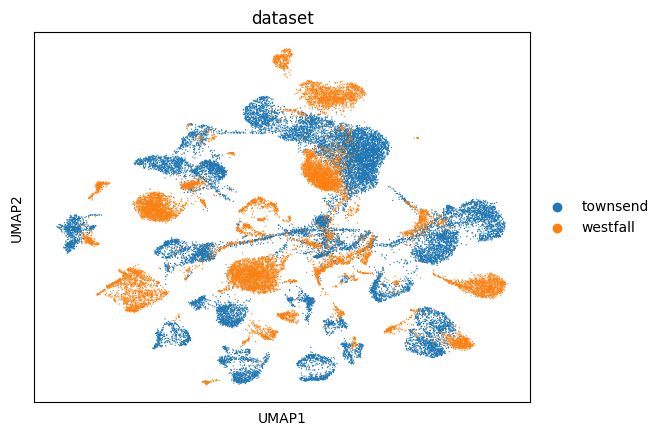

In [14]:
sc.pl.umap(adata, color=["dataset"], show=True)

# reannotate cell types based on merged, remove chung
# Subset by cell type and then DEGs across all cell types, you can also perform DE within each cluster 

In [15]:
sc.external.pp.bbknn(adata, batch_key='dataset') # this is an alternative to neighbors

In [16]:
# BBKNN doesn't correct batch matrix so here I am doing that

# Filter cells and genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


# Normalize and log transform
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.raw = adata

/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(X, out=X)
/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


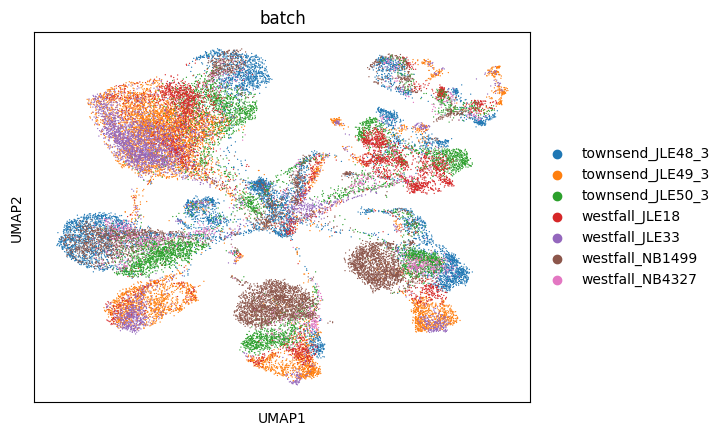

In [23]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=["batch"], show=True)



/usr/local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


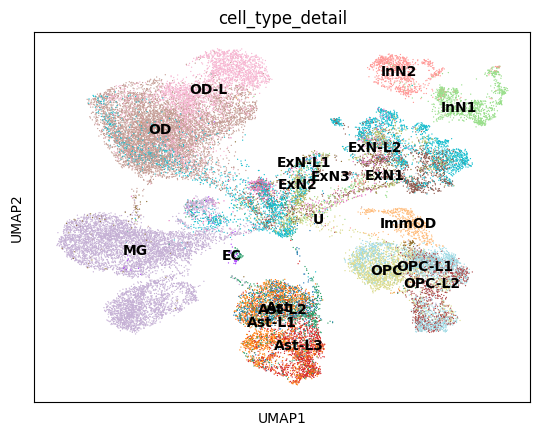

<Figure size 600x600 with 0 Axes>

In [21]:
sc.pl.umap(adata, color=["cell_type_detail"], legend_loc = 'on data', show=True)


In [14]:
#adata.write_h5ad('batch_integrated.h5ad')